In [100]:
!pip install --user -U nltk

Requirement already up-to-date: nltk in c:\users\com\appdata\roaming\python\python37\site-packages (3.4.3)


In [101]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [102]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']
stopWords = set(stopwords.words('english'))


In [103]:
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [104]:
results = []
for text in corpus:
    tmp = text.split(' ')
    for stopWord in stopWords:
        if stopWord in tmp:
            tmp.remove(stopWord)
    results.append(" ".join(tmp))

In [105]:
corpus = results
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [106]:
words = []

for sentence in corpus:
    for word in sentence.split(' '):
        words.append(word)

words = set(words)
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [107]:

word2index = dict((w, i) for i, w in enumerate(words))
index2word = dict((i, w) for i, w in enumerate(words))

In [108]:
word2index

{'man': 0,
 'pretty': 1,
 'boy': 2,
 'woman': 3,
 'strong': 4,
 'princess': 5,
 'young': 6,
 'queen': 7,
 'girl': 8,
 'wise': 9,
 'king': 10,
 'prince': 11}

In [109]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [110]:
data=[]
for sentence in sentences:
    for idx,word, in enumerate(sentence):
        start=max(idx - 2, 0)
        end=min(idx+2,len(sentence))
    for neighbor in sentence[start:end+1]:
        if neighbor !=word:
            data.append([word,neighbor])

In [111]:
data

[['man', 'king'],
 ['man', 'strong'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['man', 'boy'],
 ['man', 'young'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['king', 'prince'],
 ['king', 'young'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['strong', 'man'],
 ['pretty', 'woman'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['queen', 'princess'],
 ['queen', 'girl']]

In [112]:
import pandas as pd
df=pd.DataFrame(data,columns=["input",'label'])
df.head()

,input,label
0,man,king
1,man,strong
2,woman,queen
3,woman,wise
4,man,boy


In [113]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [114]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(index):
    one_hot_encoding = np.zeros(12)
    one_hot_encoding[index] = 1
    return one_hot_encoding

In [115]:
X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2index[x]))
    Y.append(to_one_hot_encoding(word2index[y] ))

In [116]:
# convert them to numpy arrays
X_train = np.asarray(X).astype("float32")
Y_train = np.asarray(Y).astype("float32")

In [117]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
model = Sequential()
model.add(Dense(2, input_dim=12))
model.add(Dense(12))

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [118]:
model.fit(X_train, Y_train, epochs=2000, batch_size=3)

Epoch 1/2000
18/18 [==============================] - 0s 4ms/sample - loss: 7.2969 - acc: 0.1111
Epoch 2/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.8890 - acc: 0.1111
Epoch 3/2000
18/18 [==============================] - 0s 278us/sample - loss: 5.6504 - acc: 0.1111
Epoch 4/2000
18/18 [==============================] - 0s 222us/sample - loss: 5.6522 - acc: 0.1111
Epoch 5/2000
18/18 [==============================] - 0s 278us/sample - loss: 5.6883 - acc: 0.1111
Epoch 6/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.7285 - acc: 0.1111
Epoch 7/2000
18/18 [==============================] - 0s 278us/sample - loss: 6.5126 - acc: 0.1111
Epoch 8/2000
18/18 [==============================] - 0s 222us/sample - loss: 6.4845 - acc: 0.1111
Epoch 9/2000
18/18 [==============================] - 0s 222us/sample - loss: 8.2579 - acc: 0.1111
Epoch 10/2000
18/18 [==============================] - 0s 222us/sample - loss: 5.5439 - acc: 0.1111
Epoch 11/20

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 84/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 85/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 86/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 87/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 88/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 89/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 90/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 91/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 92/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 93/2000


18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 165/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 166/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 167/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 168/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 169/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 170/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 171/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 172/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 173/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 246/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 247/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 248/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 249/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 250/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 251/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 252/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 253/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 254/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 326/2000
18/18 [==============================] - 0s 167us/sample - loss: 4.4772 - acc: 0.0556
Epoch 327/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 328/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 329/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 330/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 331/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 332/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 333/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 334/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 407/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 408/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 409/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 410/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 411/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 412/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 413/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 414/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 415/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 488/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 489/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 490/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 491/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 492/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 493/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 494/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 495/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 496/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 569/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 570/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 571/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 572/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 573/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 574/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 575/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 576/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 577/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 389us/sample - loss: 4.4772 - acc: 0.0556
Epoch 650/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 651/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 652/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 653/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 654/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 655/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 656/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 657/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 658/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 731/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 732/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 733/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 734/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 735/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 736/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 737/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 738/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 739/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 811/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 812/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 813/2000
18/18 [==============================] - 0s 167us/sample - loss: 4.4772 - acc: 0.0556
Epoch 814/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 815/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 816/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 817/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 818/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 819/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 891/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 892/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 893/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch 894/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 895/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch 896/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 897/2000
18/18 [==============================] - 0s 389us/sample - loss: 4.4772 - acc: 0.0556
Epoch 898/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 899/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 972/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 973/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 974/2000
18/18 [==============================] - 0s 167us/sample - loss: 4.4772 - acc: 0.0556
Epoch 975/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 976/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 977/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 978/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 979/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 980/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch

18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1052/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1053/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1054/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1055/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1056/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1057/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1058/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1059/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1060/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1132/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1133/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1134/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1135/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1136/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1137/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1138/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1139/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1140/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1212/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1213/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1214/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1215/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1216/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1217/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1218/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1219/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1220/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 167us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1292/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1293/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1294/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1295/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1296/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1297/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1298/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1299/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1300/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1372/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1373/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1374/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1375/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1376/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1377/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1378/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1379/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1380/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1452/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1453/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1454/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1455/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1456/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1457/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1458/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1459/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1460/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1532/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1533/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1534/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1535/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1536/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1537/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1538/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1539/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1540/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1612/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1613/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1614/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1615/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1616/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1617/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1618/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1619/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1620/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1692/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1693/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1694/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1695/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1696/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1697/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1698/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1699/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1700/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1772/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1773/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1774/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1775/2000
18/18 [==============================] - 0s 333us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1776/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1777/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1778/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1779/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1780/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1852/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1853/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1854/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1855/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1856/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1857/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1858/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1859/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1860/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0

18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1932/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1933/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1934/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1935/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1936/2000
18/18 [==============================] - 0s 278us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1937/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1938/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1939/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0556
Epoch 1940/2000
18/18 [==============================] - 0s 222us/sample - loss: 4.4772 - acc: 0.0

In [119]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 26        
_________________________________________________________________
dense_3 (Dense)              (None, 12)                36        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.layers[0].get_weights()[0]+ model.layers[0].get_weights()[1]

array([[ 0.7779387 ,  0.0493281 ],
       [ 0.98552394,  0.02823444],
       [ 0.88385344, -0.10109508],
       [ 0.33429062, -0.5038104 ],
       [ 0.06645861, -0.60803276],
       [ 0.34012422,  0.06139523],
       [-0.1957247 , -0.7233832 ],
       [ 0.35359317, -0.7940233 ],
       [ 0.45889124,  0.4000141 ],
       [ 0.3588331 , -0.37776887],
       [ 0.30888483, -0.68455505],
       [ 0.5208864 , -0.15524334]], dtype=float32)

In [121]:

vectors= model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]
vectors[:5]

array([[ 0.7779387 ,  0.0493281 ],
       [ 0.98552394,  0.02823444],
       [ 0.88385344, -0.10109508],
       [ 0.33429062, -0.5038104 ],
       [ 0.06645861, -0.60803276]], dtype=float32)

In [122]:

w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]

In [123]:
w2v_df

,word,x1,x2
0,man,0.777939,0.049328
1,pretty,0.985524,0.028234
2,boy,0.883853,-0.101095
3,woman,0.334291,-0.503810
4,strong,0.066459,-0.608033
5,princess,0.340124,0.061395
6,young,-0.195725,-0.723383
7,queen,0.353593,-0.794023
8,girl,0.458891,0.400014
9,wise,0.358833,-0.377769


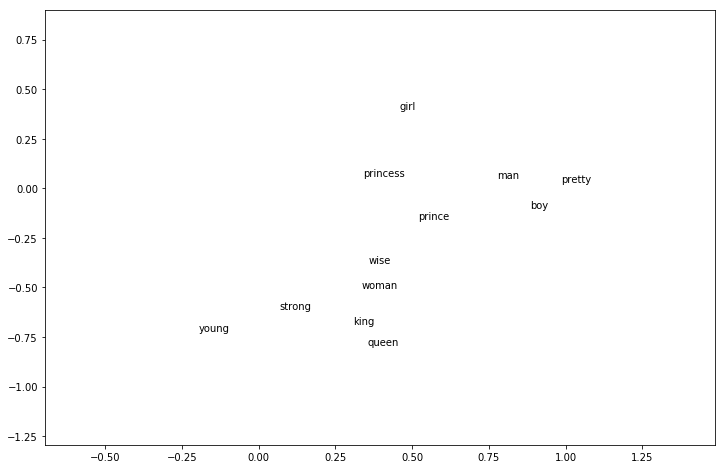

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
#축에 제한이 없으면 그림이 이상하게 그려짐    
PADDING = 0.5
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [126]:
w2v_df.set_index('word', inplace=True)

In [127]:
w2v_df.loc['king',:] - w2v_df.loc['queen',:]

x1   -0.044708
x2    0.109468
dtype: float32

In [128]:
w2v_df.loc['man'] - w2v_df.loc['woman']

x1    0.443648
x2    0.553138
dtype: float32